In [366]:
%config Completer.use_jedi = False


In [367]:
# Importamos las librerías

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None

In [368]:
df_cars=pd.read_csv('ML_cars.csv')

In [369]:
df_cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [370]:
df_cars.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [371]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

df_cars.isnull().sum()

#### Analizamos los registros duplicados

In [372]:
data_duplicates_df_cars =  df_cars.duplicated(subset=["car_ID"], keep="first")
print("registros duplicados en df_cars (car id): ", any(data_duplicates_df_cars))

registros duplicados en df_cars (car id):  False


#### Reemplazamos los numeros escritos con letras a numeros.

In [373]:
df_cars.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [374]:
inicial = ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
cambio= ['4','6','5','3','12','2','8']
dic = dict(zip(inicial, cambio))
# Realizar el reemplazo basado en el diccionario
df_cars['cylindernumber'] = df_cars['cylindernumber'].replace(dic)
df_cars['cylindernumber']=df_cars['cylindernumber'].astype(float)



In [375]:
inicialdoor = ['two','four']
cambiodoor= [2,4]
dicdoor = dict(zip(inicialdoor, cambiodoor))
# Realizar el reemplazo basado en el diccionario
df_cars['doornumber'] = df_cars['doornumber'].replace(dicdoor)
df_cars['doornumber']=df_cars['doornumber'].astype(float)

In [376]:
df_cars[['Marca', 'Modelo']] = df_cars['CarName'].str.split(' ', n=1, expand=True)
marcamal = ['alfa-romero','maxda','Nissan','porcshce','toyouta','vokswagen', 'volkswagen']
marcabien= ['alfa-romeo','mazda','nissan','porsche','toyota','vw','vw']
dicMarca = dict(zip(marcamal, marcabien))
# Realizar el reemplazo basado en el diccionario
df_cars['Marca'] = df_cars['Marca'].replace(dicMarca)

### Análisis descriptivo de variables numéricas

In [377]:
variables_numericas = df_cars[['car_ID', 'symboling', 'wheelbase', 'doornumber',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

In [378]:
variables_numericas.describe()

,car_ID,symboling,wheelbase,doornumber,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,3.121951,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,0.994966,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,2.000000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,2.000000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,4.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,4.000000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,4.000000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [379]:
variables_numericas_box1 = df_cars[[
       'carlength', 'enginesize', 'horsepower']]

In [380]:
variables_numericas_box2 = df_cars[[ 'wheelbase', 'carwidth', 'carheight'
       , 'citympg', 'highwaympg']]

In [381]:
variables_numericas_box3 =  df_cars[[ 'curbweight','peakrpm']]

In [382]:
variables_numericas_box4= df_cars[['boreratio','stroke','compressionratio']]

<AxesSubplot:>

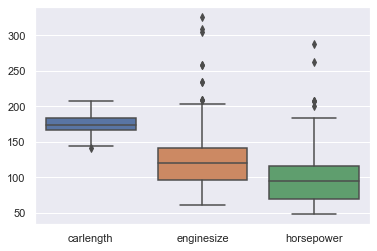

In [383]:
sns.boxplot(data=variables_numericas_box1)

<AxesSubplot:>

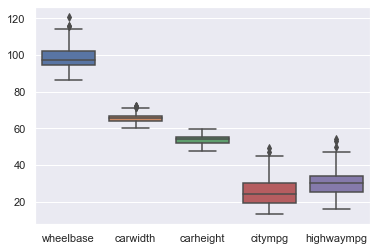

In [384]:
sns.boxplot(data=variables_numericas_box2)

<AxesSubplot:>

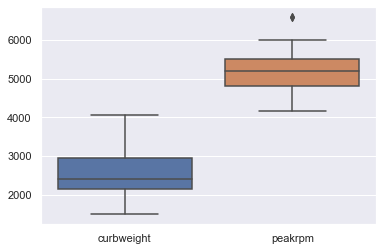

In [385]:
sns.boxplot(data=variables_numericas_box3)

<AxesSubplot:>

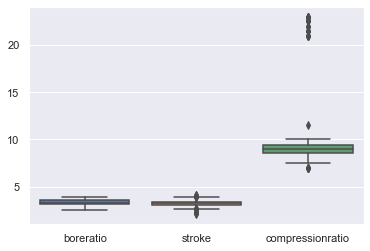

In [386]:
sns.boxplot(data=variables_numericas_box4)

In [387]:
corr_variables_numericas = variables_numericas.corr()

<AxesSubplot:>

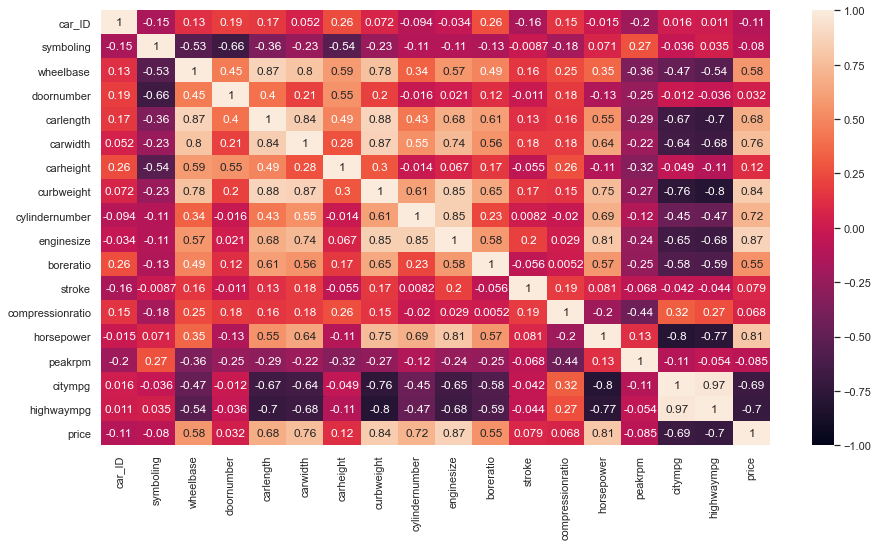

In [388]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_variables_numericas,annot=True, vmax=1,vmin=-1)

In [389]:
# saco carlength, saco wheelbase dejo carwidth
# saco dejo curbweight  saco engine size y carwidth

### Analisis descriptivo de variables categoricas

In [390]:
variables_categoricas =['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
        'fuelsystem','Marca']

gas       185
diesel     20
Name: fueltype, dtype: int64


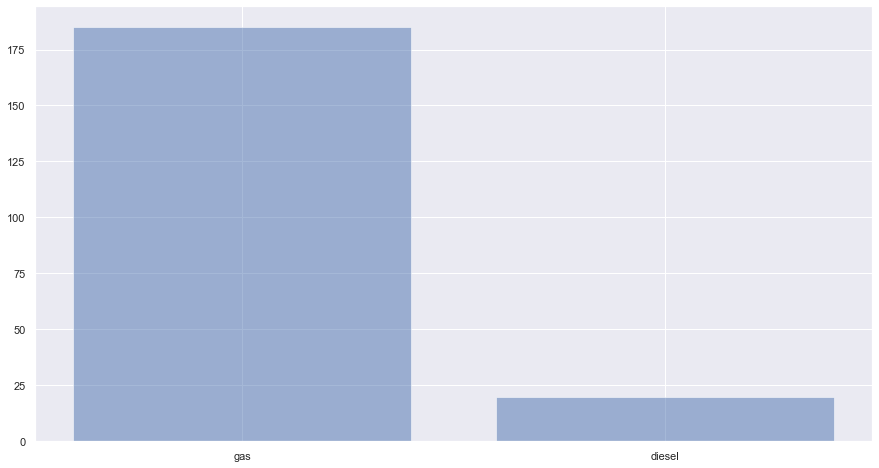

std      168
turbo     37
Name: aspiration, dtype: int64


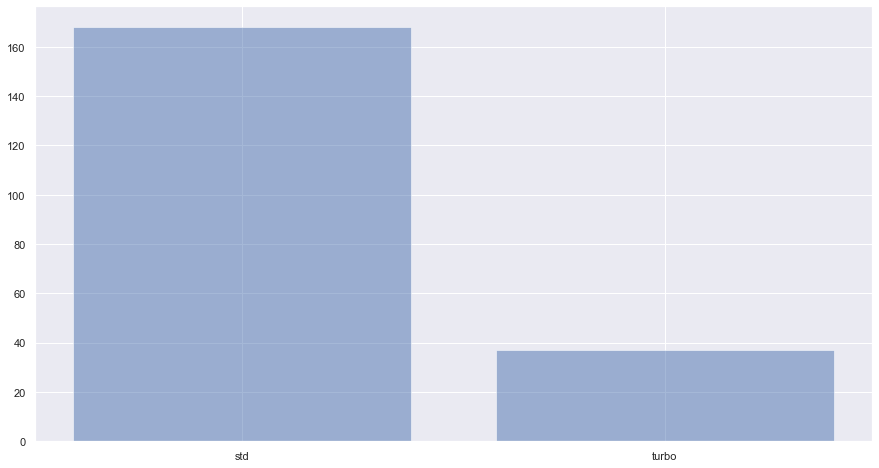

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


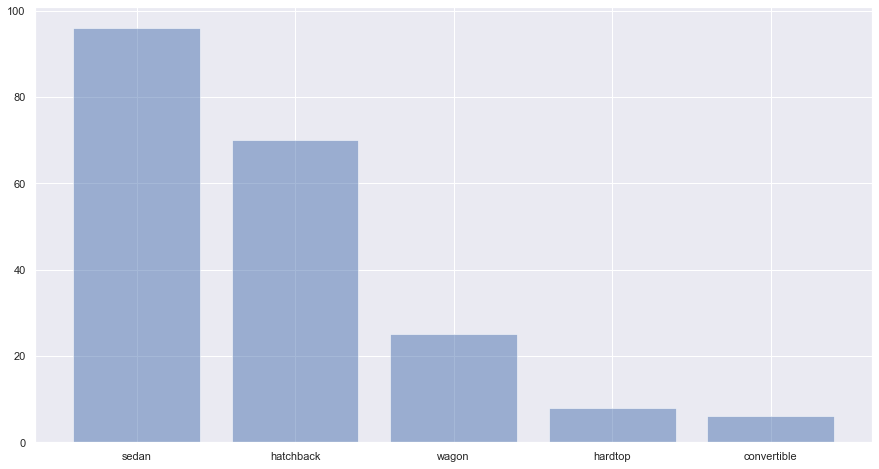

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


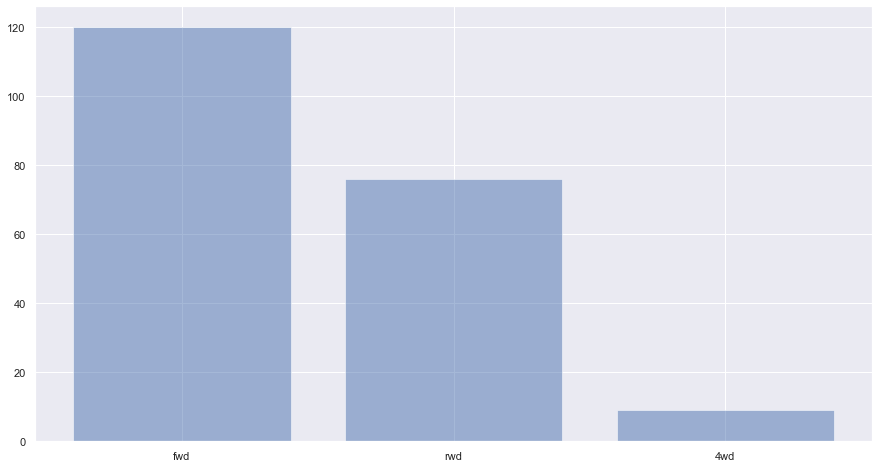

front    202
rear       3
Name: enginelocation, dtype: int64


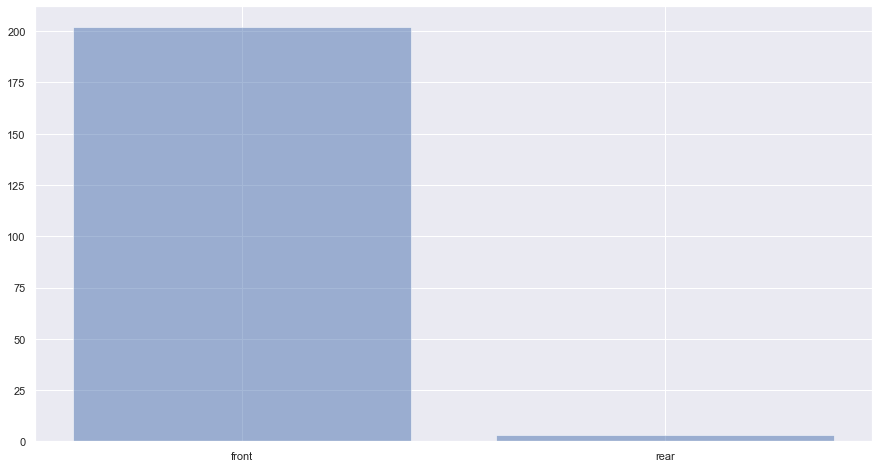

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


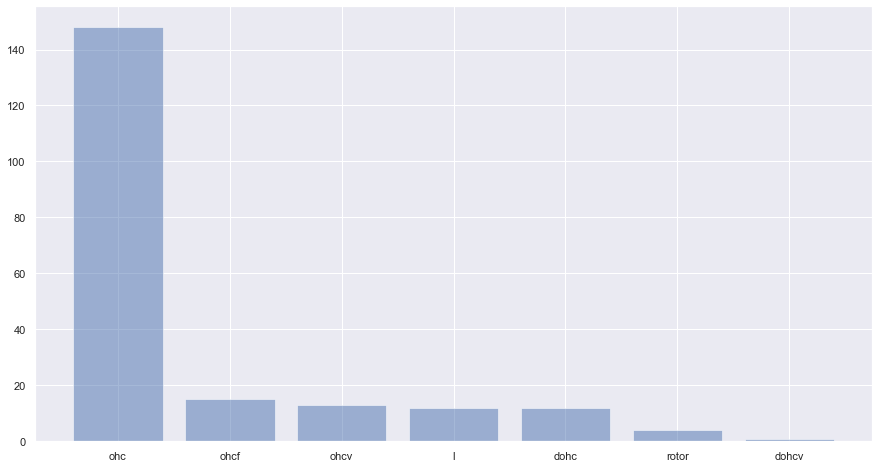

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


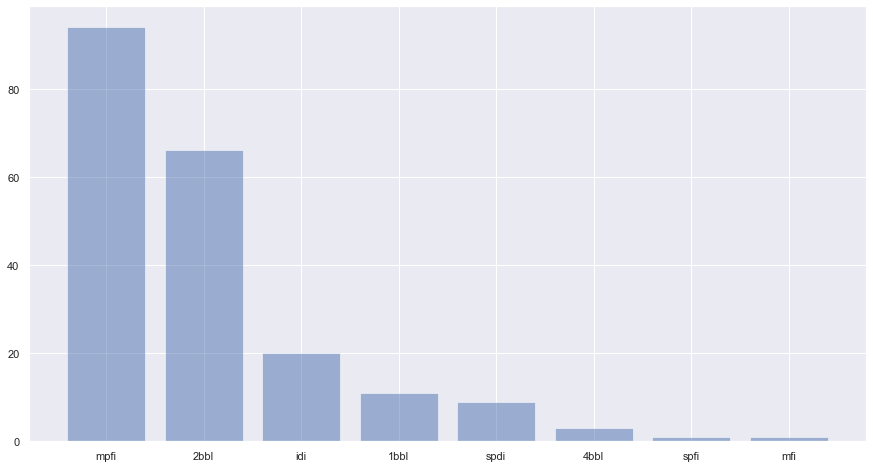

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
subaru        12
vw            12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
chevrolet      3
jaguar         3
alfa-romeo     3
renault        2
mercury        1
Name: Marca, dtype: int64


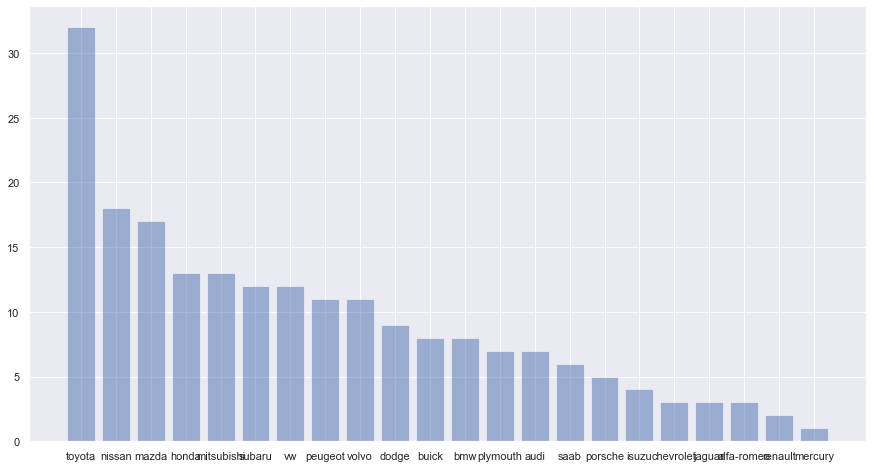

In [391]:
for category in variables_categoricas:
    print(df_cars[category].value_counts())
    plt.bar(df_cars[category].value_counts().index, df_cars[category].value_counts().values, color='b',\
            alpha=0.5)
    plt.show()

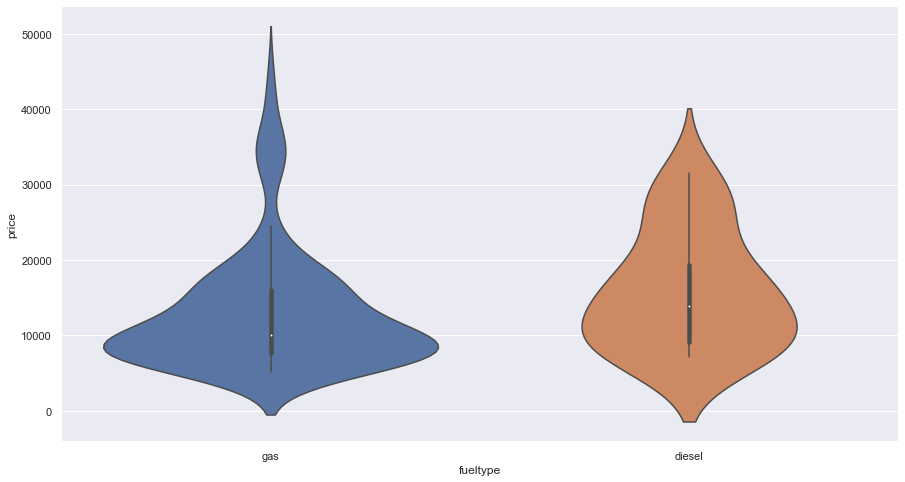

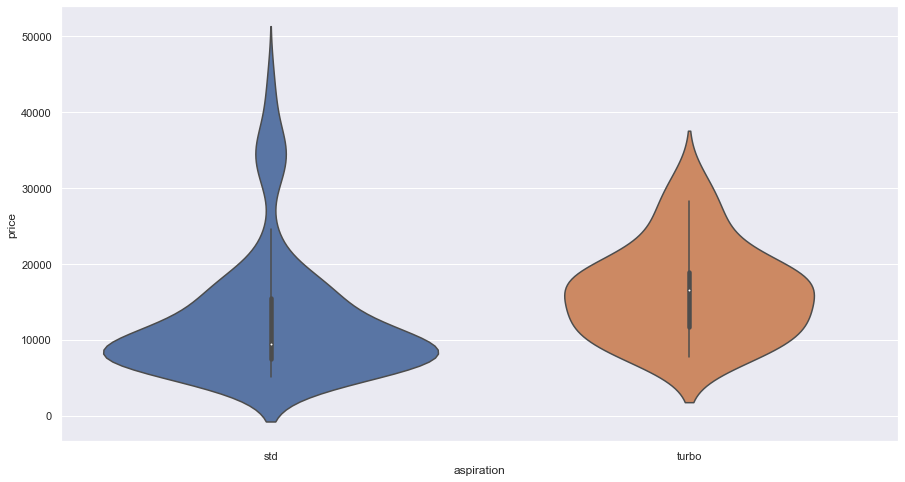

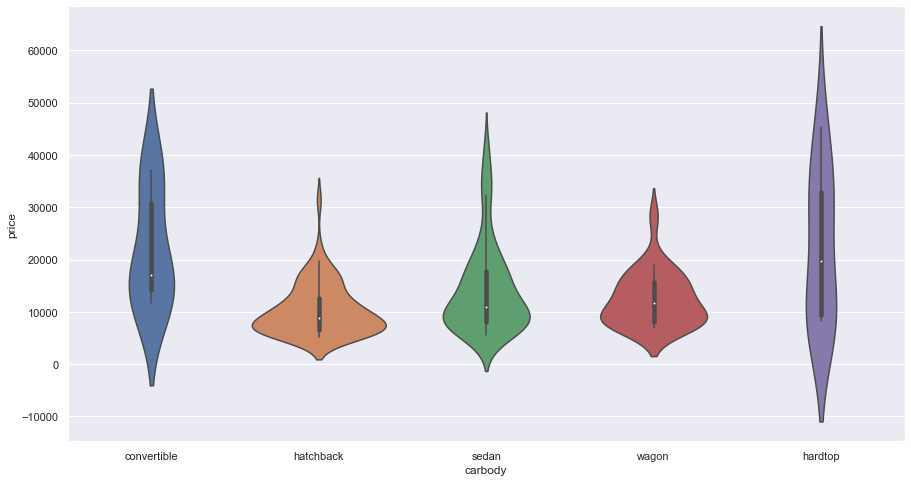

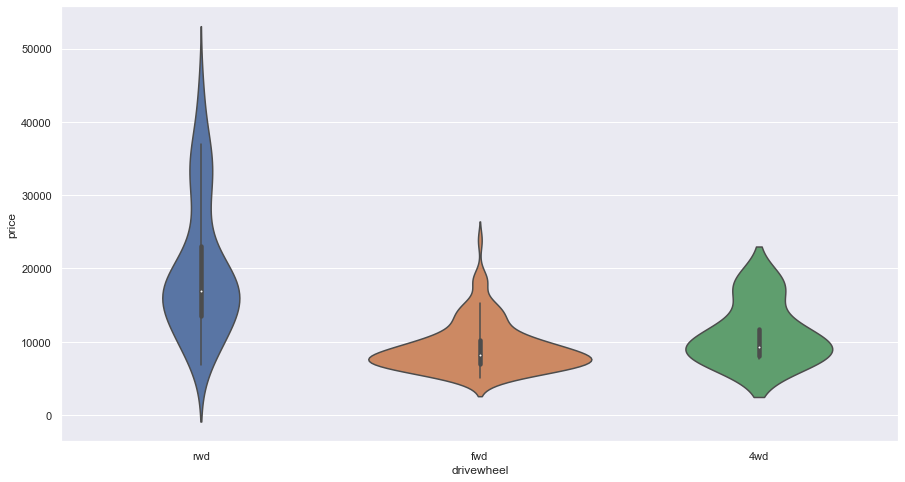

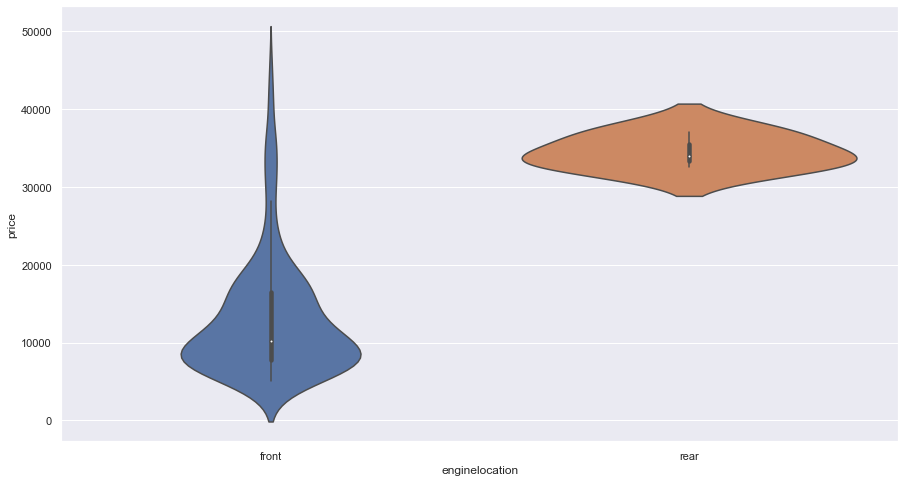

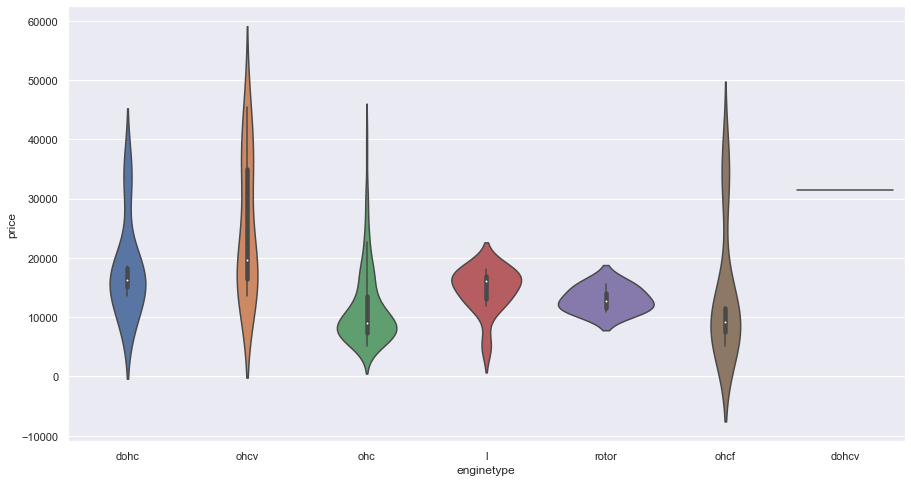

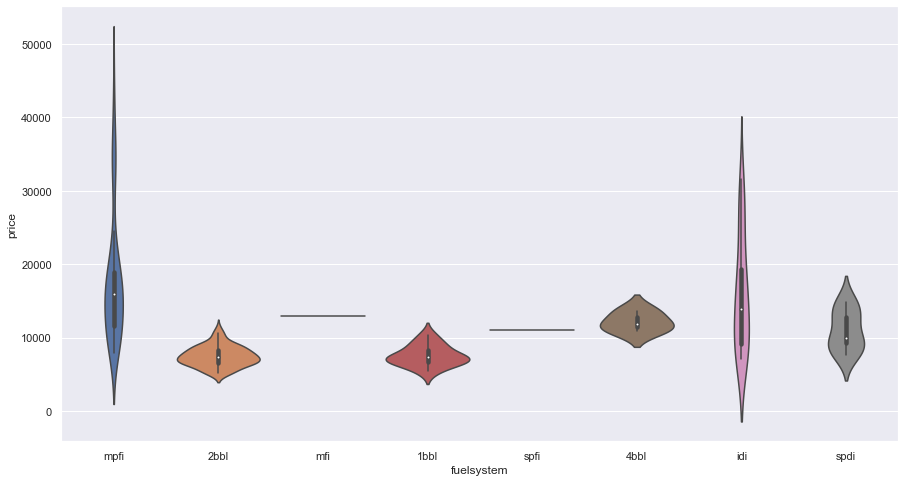

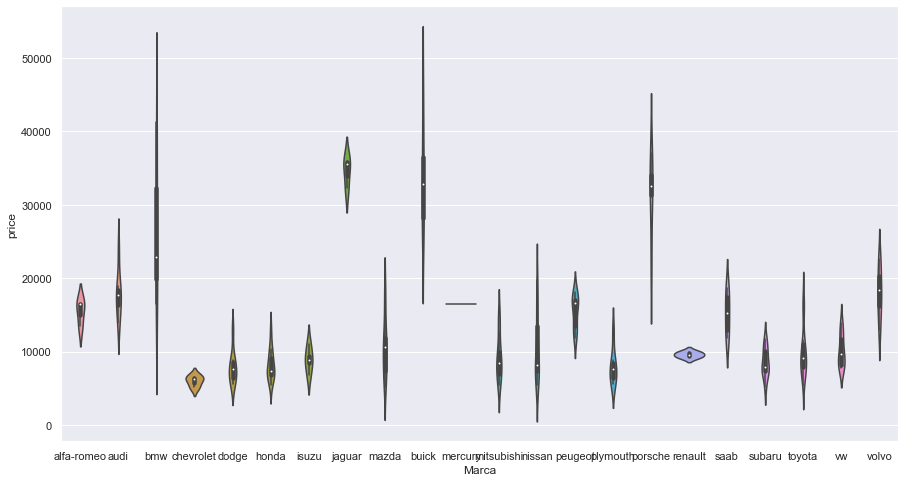

In [392]:
for category in variables_categoricas:
    sns.violinplot(x=category, y='price', data=df_cars)
    plt.show()

#### Creación de variables dummies

In [393]:
dfCars= pd.get_dummies( df_cars,columns=variables_categoricas, 
                            drop_first = False, dtype=int)

In [394]:
dfCars

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Modelo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Marca_alfa-romeo,Marca_audi,Marca_bmw,Marca_buick,Marca_chevrolet,Marca_dodge,Marca_honda,Marca_isuzu,Marca_jaguar,Marca_mazda,Marca_mercury,Marca_mitsubishi,Marca_nissan,Marca_peugeot,Marca_plymouth,Marca_porsche,Marca_renault,Marca_saab,Marca_subaru,Marca_toyota,Marca_volvo,Marca_vw
0,1,3,alfa-romero giulia,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4.0,109.1,188.8,68.9,55.5,2952,4.0,141,3.78,3.15,9.5,114,5400,23,28,16845.0,145e (sw),0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
201,202,-1,volvo 144ea,4.0,109.1,188.8,68.8,55.5,3049,4.0,141,3.78,3.15,8.7,160,5300,19,25,19045.0,144ea,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
202,203,-1,volvo 244dl,4.0,109.1,188.8,68.9,55.5,3012,6.0,173,3.58,2.87,8.8,134,5500,18,23,21485.0,244dl,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
203,204,-1,volvo 246,4.0,109.1,188.8,68.9,55.5,3217,6.0,145,3.01,3.40,23.0,106,4800,26,27,22470.0,246,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [395]:
dfCars.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Modelo',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_alfa-romeo', 'Marca_audi',
       'Marca_bmw', 'Marca_buick', 'Marca_chevrolet', 'Marca_dodge

### Modelo de Regresion lineal

In [396]:
# Creamos X e y

feature_cols = ['symboling', 'doornumber',
       'carlength','carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_alfa-romeo', 'Marca_audi',
       'Marca_bmw', 'Marca_buick', 'Marca_chevrolet', 'Marca_dodge',
       'Marca_honda', 'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda',
       'Marca_mercury', 'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot',
       'Marca_plymouth', 'Marca_porsche', 'Marca_renault', 'Marca_saab',
       'Marca_subaru', 'Marca_toyota', 'Marca_volvo', 'Marca_vw']

X = dfCars[feature_cols]
y = dfCars.price

In [397]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics

#### modelo de regesion Lineal

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42) 
linear_model = LinearRegression()
linear_model.fit(X, y)
from sklearn import metrics

y_pred=linear_model.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

MAE: 1263.4663883399005
MSE: 3777743.0969136823
RMSE: 1943.6417100159388
R2: 0.9454748217039103


#### modelo de regresion lineal con cross validation

In [399]:
def regresion(feature_cols):

    X = dfCars[feature_cols]
    y = dfCars.price
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
    linreg = LinearRegression()
 
    linreg.fit(X_train, y_train)
 
    score = linreg.score(X_train,y_train)
 
    print("Metrica del modelo sin cross validation", score)
    
    kf = KFold(n_splits=7, shuffle=True, random_state=68)
 
    cv_scores = cross_val_score(linreg, X_train, y_train, cv=kf)
    
    cv_scores = [round(num, 3) for num in cv_scores]
    print('Se obtienen los siguientes coeficientes de determinación con cross validation:')
    print(cv_scores)
    print(f'Max R-Squared: {max(cv_scores)}')
    print(f'Min R-Squared: {min(cv_scores)}')
    print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
    print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
    print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}', '\n')
 
    y_pred = linreg.predict(X_test)
    print ('Metricas en Test')
    print ('Test MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('Test MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('test R2:', metrics.r2_score(y_test, y_pred))

In [400]:
feature_cols_gonza = ['symboling','doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_alfa-romeo', 'Marca_audi',
       'Marca_bmw', 'Marca_buick', 'Marca_chevrolet', 'Marca_dodge',
       'Marca_honda', 'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda',
       'Marca_mercury', 'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot',
       'Marca_plymouth', 'Marca_porsche', 'Marca_renault', 'Marca_saab',
       'Marca_subaru', 'Marca_toyota', 'Marca_volvo', 'Marca_vw']

In [401]:
regresion(feature_cols_gonza)

Metrica del modelo sin cross validation 0.9747862994832558
Se obtienen los siguientes coeficientes de determinación con cross validation:
[0.868, 0.902, 0.884, 0.88, 0.948, 0.968, 0.936]
Max R-Squared: 0.968
Min R-Squared: 0.868
Promedio R-Squared: 0.912
Desviación Estándar: 0.036
Intervalo de confianza 95%: [0.8698 0.965 ] 

Metricas en Test
Test MAE: 1857.8492876000425
Test MSE: 9490515.813471116
Test RMSE: 3080.6680790814053
test R2: 0.877409425715521


In [402]:
feature_cols_sin_colinealiedades = ['symboling','doornumber', 'wheelbase',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'citympg', 
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_alfa-romeo', 'Marca_audi',
       'Marca_bmw', 'Marca_buick', 'Marca_chevrolet', 'Marca_dodge',
       'Marca_honda', 'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda',
       'Marca_mercury', 'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot',
       'Marca_plymouth', 'Marca_porsche', 'Marca_renault', 'Marca_saab',
       'Marca_subaru', 'Marca_toyota', 'Marca_volvo', 'Marca_vw']

#### Probamos regularizacion

In [403]:
# Ahora entrenamos el modelo con todas las variables con Ridge:
from sklearn import linear_model
kf = KFold(n_splits=7, shuffle=True, random_state=68)

lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize=True) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

Regu_Ridge = lm_ridge.fit(X_train, y_train)

print('Regu_Ridge:', model_4.score(X_test, y_test))

Regu_Ridge: 0.9305492209928966


#### Ahora vamos a relizar un modelo que sea de calsificacion para identificar si un vheículo es de gama alta o baja


In [404]:
dfCars_cl=dfCars

In [405]:
medianaPrice=dfCars_cl['price'].median()
medianaPrice

10295.0

In [406]:
condicion = lambda x: '1' if x > medianaPrice else '0'
dfCars_cl['gama'] = dfCars_cl.apply(lambda x: '1' if x['price']>medianaPrice else '0',axis=1)

In [407]:
X = dfCars[feature_cols]
y = dfCars.gama

In [408]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [410]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

realizar dos listas, una con los estimadores de los modelos y otra con la grid de parámetros a estimar en cada modelo.

iterar sobre esas listas para estimar los hiperparámetros de los modelos

In [411]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier()]

In [412]:
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']},
    {'n_neighbors': range(1,50),
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]},
    { "criterion" : ["gini", "entropy"],
      "min_samples_leaf": [5,10,15,20,None], 
      "max_depth" : [1,3,4,5,8,9,10,11,12,13,14,None],
      "min_samples_split": [2, 3, 4,None]}
]

In [413]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [414]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')


C:\Users\silde\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14,
                                       None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')


In [415]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.9455882352941177
LogisticRegression(C=10, solver='saga')
{'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.9216911764705882
KNeighborsClassifier(n_neighbors=1, p=1)
{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.9084558823529412
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [416]:
pd.DataFrame(grids[0].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033060,0.008497,0.001623,0.003247,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.823529,1.000000,0.882353,0.882353,0.8750,0.9375,0.8750,0.8750,1.0,0.9375,0.908824,0.055118,8
1,0.024299,0.003987,0.000800,0.002399,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.882353,0.941176,0.941176,0.882353,0.9375,0.9375,0.8750,0.9375,1.0,0.9375,0.927206,0.035864,7
2,0.030063,0.005326,0.000000,0.000000,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.941176,0.941176,0.941176,0.882353,0.8750,0.9375,0.9375,0.9375,1.0,0.9375,0.933088,0.032710,6
3,0.020168,0.004023,0.000942,0.002508,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.941176,0.941176,0.941176,0.882353,1.0000,0.9375,0.9375,0.9375,1.0,0.9375,0.945588,0.032000,1
4,0.030219,0.003768,0.000000,0.000000,100,l1,saga,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",0.941176,0.941176,0.941176,0.882353,1.0000,0.9375,0.9375,0.9375,1.0,0.9375,0.945588,0.032000,1
5,0.019465,0.005206,0.000900,0.002385,100,l2,saga,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",0.882353,0.941176,0.941176,0.882353,0.9375,0.9375,0.9375,0.9375,1.0,0.9375,0.933456,0.031388,5
6,0.026671,0.003870,0.000301,0.000903,1000,l1,saga,"{'C': 1000, 'penalty': 'l1', 'solver': 'saga'}",0.941176,0.941176,0.941176,0.882353,1.0000,0.9375,0.9375,0.9375,1.0,0.9375,0.945588,0.032000,1
7,0.019223,0.005696,0.001101,0.002468,1000,l2,saga,"{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}",0.941176,0.941176,0.941176,0.882353,0.9375,0.9375,0.9375,0.9375,1.0,0.9375,0.939338,0.026371,4


In [417]:
pd.DataFrame(grids[1].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001652,0.003306,0.003257,0.003991,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.823529,0.941176,0.882353,0.882353,1.0000,0.8750,1.0000,0.9375,1.0000,0.8750,0.921691,0.060098,1
1,0.002419,0.003695,0.001618,0.003237,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.823529,0.941176,0.882353,0.882353,1.0000,0.8750,1.0000,0.9375,1.0000,0.8750,0.921691,0.060098,1
2,0.001612,0.003223,0.003318,0.004065,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.823529,0.941176,0.882353,0.823529,1.0000,0.8750,0.9375,0.9375,1.0000,0.8125,0.903309,0.066848,31
3,0.002407,0.003676,0.001606,0.003213,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.823529,0.941176,0.882353,0.823529,1.0000,0.8750,0.9375,0.9375,1.0000,0.8125,0.903309,0.066848,31
4,0.000000,0.000000,0.007189,0.002422,1,3,uniform,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}",0.823529,0.941176,0.882353,0.823529,1.0000,0.8750,0.9375,0.9375,0.9375,0.8125,0.897059,0.060097,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.000301,0.000902,0.001301,0.002687,49,1,distance,"{'n_neighbors': 49, 'p': 1, 'weights': 'distan...",0.882353,0.941176,0.882353,0.823529,1.0000,0.8750,0.9375,0.8750,1.0000,0.8750,0.909191,0.055320,12
290,0.001601,0.003203,0.001600,0.003201,49,2,uniform,"{'n_neighbors': 49, 'p': 2, 'weights': 'uniform'}",0.882353,0.882353,0.823529,0.705882,0.9375,0.8125,0.8750,0.8125,0.9375,0.8125,0.848162,0.066096,184
291,0.001600,0.003200,0.002398,0.003663,49,2,distance,"{'n_neighbors': 49, 'p': 2, 'weights': 'distan...",0.823529,0.882353,0.823529,0.705882,0.9375,0.8125,0.9375,0.8750,0.9375,0.8125,0.854779,0.070282,172
292,0.000800,0.002399,0.004000,0.003604,49,3,uniform,"{'n_neighbors': 49, 'p': 3, 'weights': 'uniform'}",0.823529,0.823529,0.705882,0.529412,0.7500,0.7500,0.6875,0.8125,0.8125,0.6875,0.738235,0.086983,270


In [418]:
pd.DataFrame(grids[2].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.000800,0.002401,gini,1,5,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.882353,1.0,0.823529,0.764706,1.0,0.9375,0.8125,0.875,0.9375,0.875,0.890809,0.074389,58
1,0.001599,0.003198,0.000799,0.002398,gini,1,5,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.882353,1.0,0.823529,0.764706,1.0,0.9375,0.8125,0.875,0.9375,0.875,0.890809,0.074389,58
2,0.000000,0.000000,0.000701,0.002102,gini,1,5,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.882353,1.0,0.823529,0.764706,1.0,0.9375,0.8125,0.875,0.9375,0.875,0.890809,0.074389,58
3,0.000701,0.002102,0.000000,0.000000,gini,1,5,None,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379
4,0.000800,0.002401,0.000800,0.002401,gini,1,10,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.882353,1.0,0.823529,0.764706,1.0,0.9375,0.8125,0.875,0.9375,0.875,0.890809,0.074389,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.001004,0.002007,0.000000,0.000000,entropy,None,20,None,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330
476,0.000800,0.002401,0.000000,0.000000,entropy,None,None,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321
477,0.001601,0.003202,0.000000,0.000000,entropy,None,None,3,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300
478,0.001598,0.003197,0.000000,0.000000,entropy,None,None,4,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469


In [419]:
X_test = scaler.transform(X_test)

In [420]:
y_preds_log = grids[0].predict(X_test)
y_preds_knn = grids[1].predict(X_test)
y_preds_tree = grids[2].predict(X_test)

In [421]:
print (classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.90      0.90      0.90        21

    accuracy                           0.90        41
   macro avg       0.90      0.90      0.90        41
weighted avg       0.90      0.90      0.90        41



In [422]:
confusion_matrix(y_test, y_preds_log)

array([[18,  2],
       [ 2, 19]], dtype=int64)

In [423]:
print (classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.90      0.90      0.90        21

    accuracy                           0.90        41
   macro avg       0.90      0.90      0.90        41
weighted avg       0.90      0.90      0.90        41



In [424]:
confusion_matrix(y_test, y_preds_knn)

array([[18,  2],
       [ 2, 19]], dtype=int64)

In [425]:
print (classification_report(y_test, y_preds_tree))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.90      0.90      0.90        21

    accuracy                           0.90        41
   macro avg       0.90      0.90      0.90        41
weighted avg       0.90      0.90      0.90        41



In [426]:
confusion_matrix(y_test, y_preds_tree)

array([[18,  2],
       [ 2, 19]], dtype=int64)